In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


print(tf.__version__)

2.17.0


Primera prueba - Test de entrenamiento

In [16]:
# Parámetros
basePath = '../data'  # Ajusta la ruta si es necesario
train_dir = os.path.join(basePath, 'preprocessed', 'train')  # Ruta para entrenar
val_dir = os.path.join(basePath, 'preprocessed', 'validation')  # Ruta para validar
batch_size = 32
img_size = (224, 224)
num_classes = 1
epochs = 30

In [17]:
# Data Augmentation para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Augmentation para el conjunto de validación (solo rescalado)
val_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Cargar la red base preentrenada (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=img_size + (3,),
                                               include_top=False, weights='imagenet')

# Congelar la red base (no entrenamos las capas preentrenadas)
base_model.trainable = False

# Añadir capas superiores para nuestra clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
#model.summary()

# Entrenar el modelo con la barra de progreso
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('../models/reconocimiento_facial_15_personas.h5')

Found 106 images belonging to 1 classes.
Found 27 images belonging to 1 classes.
Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - va

Evaluacion del Modelo

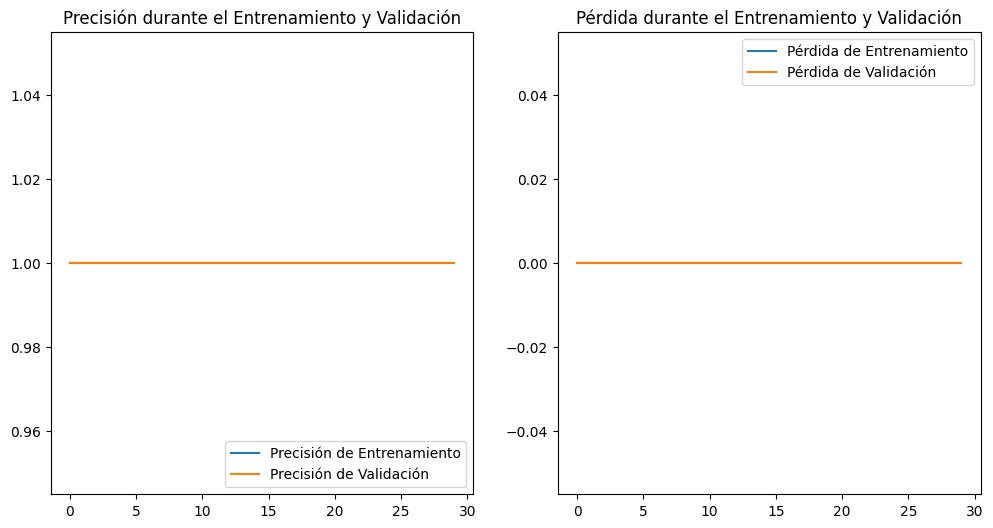

In [18]:
# Graficar el rendimiento del modelo
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    # Graficar la precisión
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
    plt.plot(epochs_range, val_acc, label='Precisión de Validación')
    plt.legend(loc='lower right')
    plt.title('Precisión durante el Entrenamiento y Validación')

    # Graficar la pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
    plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
    plt.legend(loc='upper right')
    plt.title('Pérdida durante el Entrenamiento y Validación')

    # Mostrar las gráficas
    plt.show()

# Llamar la función para graficar el rendimiento
plot_training(history)